EN ESTE NOTEBOOK:
    
Se busca realizar el clustering de guajira y bolivar en permanencia y transformacion, por medio del clasificador GMMMHMM, 

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
os.getcwd()

'/Users/nesdav/Documents/AnalisisVariables/paraescogerlosdias'

#  # Procesamiento de datos para Bolivar con Transformacion 

In [128]:
dBolivar = pd.read_csv("/Users/nesdav/Documents/AnalisisVariables/Datospuros/DatosBolivar.csv")
dBolivar.head()


,Unnamed: 0,Grabadora,Lugar,DiaGrabadora,Transformación,Permanencia,Longitud,ACIft,ADI,ACItf,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,20170123,302143,Bolívar,20170123302143,Alta,Alta,75º9'42.71'' W,0.881962,1.379585,0.686409,...,-0.727844,-0.582862,-0.308798,-0.926150,-0.331057,-0.084834,-0.863395,-1.828042,-2.117518,-2.407747
1,20170124,302143,Bolívar,20170124302143,Alta,Alta,75º9'42.71'' W,1.022423,1.613610,1.378754,...,-0.678477,-0.679741,0.243078,-0.736514,-0.277029,-0.368561,-0.961068,-1.967073,-2.226737,-2.740342
2,20170125,302143,Bolívar,20170125302143,Alta,Alta,75º9'42.71'' W,1.111161,1.282333,1.501813,...,-0.429357,-0.596137,0.282601,-0.416820,-0.122728,-0.193827,-0.809835,-2.247025,-2.729378,-2.948249
3,20170126,302143,Bolívar,20170126302143,Alta,Alta,75º9'42.71'' W,1.668050,1.371015,1.627049,...,-0.982034,-1.063291,0.153703,-0.902967,-0.663794,-0.948217,-1.586745,-2.645995,-2.926667,-3.717506
4,20170127,302143,Bolívar,20170127302143,Alta,Alta,75º9'42.71'' W,1.357598,1.473565,1.291146,...,-0.857031,-0.913720,0.131137,-0.725502,-0.514248,-0.349673,-1.012663,-2.140703,-2.623220,-3.301840


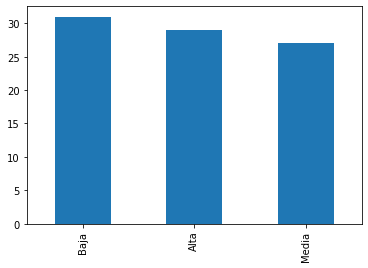

In [133]:
dBolivar['Transformación'].value_counts().plot(kind='bar')


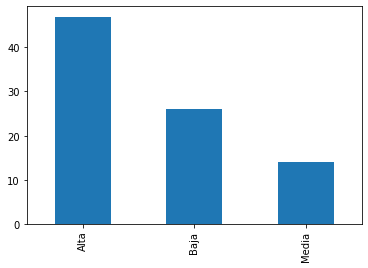

In [134]:
dBolivar['Permanencia'].value_counts().plot(kind='bar')

In [7]:
#En MetaBolivar se encuentran los datos que no son las variables como la grabadora el dia etc 
MetaBolivar=dBolivar.iloc[:,1:7].copy()
dBolivar.drop(dBolivar.iloc[:, 0:7], inplace = True, axis = 1) 
dBolivar.head()

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,0.881962,1.379585,0.686409,0.373569,0.780667,-0.995664,0.102277,-0.442452,0.138900,-0.164821,...,-0.727844,-0.582862,-0.308798,-0.926150,-0.331057,-0.084834,-0.863395,-1.828042,-2.117518,-2.407747
1,1.022423,1.613610,1.378754,0.689791,0.740971,-0.858666,0.272442,-0.274770,0.139990,-0.145246,...,-0.678477,-0.679741,0.243078,-0.736514,-0.277029,-0.368561,-0.961068,-1.967073,-2.226737,-2.740342
2,1.111161,1.282333,1.501813,0.635879,0.750587,-1.359903,0.467130,0.044668,0.142089,-0.047032,...,-0.429357,-0.596137,0.282601,-0.416820,-0.122728,-0.193827,-0.809835,-2.247025,-2.729378,-2.948249
3,1.668050,1.371015,1.627049,1.026570,0.600144,-1.692530,0.609323,0.375187,0.159901,0.208658,...,-0.982034,-1.063291,0.153703,-0.902967,-0.663794,-0.948217,-1.586745,-2.645995,-2.926667,-3.717506
4,1.357598,1.473565,1.291146,0.762733,0.703073,-1.255721,0.266256,0.170234,0.145432,0.152065,...,-0.857031,-0.913720,0.131137,-0.725502,-0.514248,-0.349673,-1.012663,-2.140703,-2.623220,-3.301840


In [8]:
#En yprueba se encuentra las etiquetas
ypruebaB=MetaBolivar["Transformación"]
trans={'Alta':2,'Baja':0,'Media':1}
ypruebaB=[trans[item] for item in ypruebaB]

In [108]:
#En yprueba se encuentra las etiquetas
ypruebaBP=MetaBolivar["Transformación"]
trans={'Alta':2,'Baja':0,'Media':1}
ypruebaBP=[trans[item] for item in ypruebaBP]

In [30]:
#Se estandarizan los datos y quedan guardados en scalx
x= StandardScaler().fit_transform(dBolivar.values)  ##give numpy array values
scalx=pd.DataFrame(x,index=dBolivar.index,columns=dBolivar.columns) #so we need to transform it 
d=scalx.copy()
scalx.head()



,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,0.575765,1.807894,0.913473,-0.032966,0.957857,-1.182702,-0.100688,-0.777554,1.086514,0.010648,...,-0.241771,-0.333451,-0.384668,-0.654261,-0.078202,0.023575,-0.814086,-1.434639,-1.545367,-1.721528
1,0.700540,2.083039,1.691185,0.383597,0.879495,-1.019647,0.181739,-0.614388,1.088246,0.044017,...,-0.195525,-0.431560,0.186044,-0.451768,-0.021070,-0.317607,-0.921061,-1.571911,-1.646050,-2.003471
2,0.779368,1.693554,1.829417,0.312579,0.898477,-1.616221,0.504868,-0.303554,1.091580,0.211435,...,0.037845,-0.346894,0.226915,-0.110400,0.142091,-0.107489,-0.755425,-1.848323,-2.109407,-2.179715
3,1.274066,1.797818,1.970095,0.827240,0.601497,-2.012113,0.740869,0.018063,1.119863,0.647289,...,-0.479892,-0.819977,0.093619,-0.629506,-0.430045,-1.014644,-1.606324,-2.242248,-2.291277,-2.831819
4,0.998284,1.918387,1.592775,0.479685,0.804683,-1.492223,0.171472,-0.181370,1.096888,0.550819,...,-0.362791,-0.668508,0.070282,-0.440009,-0.271912,-0.294895,-0.977569,-1.743345,-2.011546,-2.479456


In [7]:
import numpy as np
import matplotlib.pyplot as plt
anomalies = []
outliers=[]
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    #print(lower_limit)
    # Generate outliers
    anomalies = []
    for index, outlier in enumerate(random_data):
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
            print("esta en la posicion",index)
    return anomalies
    

In [82]:
d=scalx.copy()

for index ,i in enumerate(d.columns):
    print("los outliers en",d.columns[index])
    a=find_anomalies(d.iloc[:,index])
    if len(a)>2:
        for b in range(len(a)):
            print ('aaa',b)
            d[i].iloc[b]= d[i].mean()
            print ('datos corregidos', d[i].iloc[b])
    elif len(a) == 1:
        print("prim", i)
        print("second",d[i].mean())
        d[i].iloc[index]= d[i].mean()
        
dw=d.copy()


los outliers en ACIft
esta en la posicion 54
prim ACIft
second 1.5313421029312504e-17
los outliers en ADI
los outliers en ACItf
los outliers en BI
los outliers en TE
los outliers en ESM
los outliers en NDSI
los outliers en P
esta en la posicion 37
prim P
second 1.1229842088162504e-16
los outliers en M
los outliers en NP
esta en la posicion 23
esta en la posicion 24
esta en la posicion 25
esta en la posicion 26
aaa 0
datos corregidos 9.124246696632034e-17
aaa 1
datos corregidos -0.00012239005942281438
aaa 2
datos corregidos -0.0006297412799011978
aaa 3
datos corregidos -0.003067265115278446
los outliers en MID
los outliers en BNF
los outliers en BNT
los outliers en MD
los outliers en FM
los outliers en SF
esta en la posicion 84
esta en la posicion 85
los outliers en RMS
los outliers en CF
esta en la posicion 45
prim CF
second 6.993128936719377e-16
los outliers en ADIm1
los outliers en ADIm2
los outliers en ADIm3
los outliers en ADIm4
los outliers en ADIm5
los outliers en ADIm6
los outli

In [84]:
##Creo una nueva db que tendra los datos sin outliers
dwitouliers=d
#y reemplazo los outliers por la media del vector 
dwitouliers.ACIft[54]=d.ACIft.mean()
dwitouliers.P[37]=d.P.mean()
dwitouliers.NP[23]=d.NP.mean()
dwitouliers.NP[24]=d.NP.mean()
dwitouliers.NP[25]=d.NP.mean()
dwitouliers.NP[26]=d.NP.mean()
dwitouliers.SF[84]=d.SF.mean()
dwitouliers.SF[85]=d.SF.mean()
dwitouliers.CF[45]=d.CF.mean()



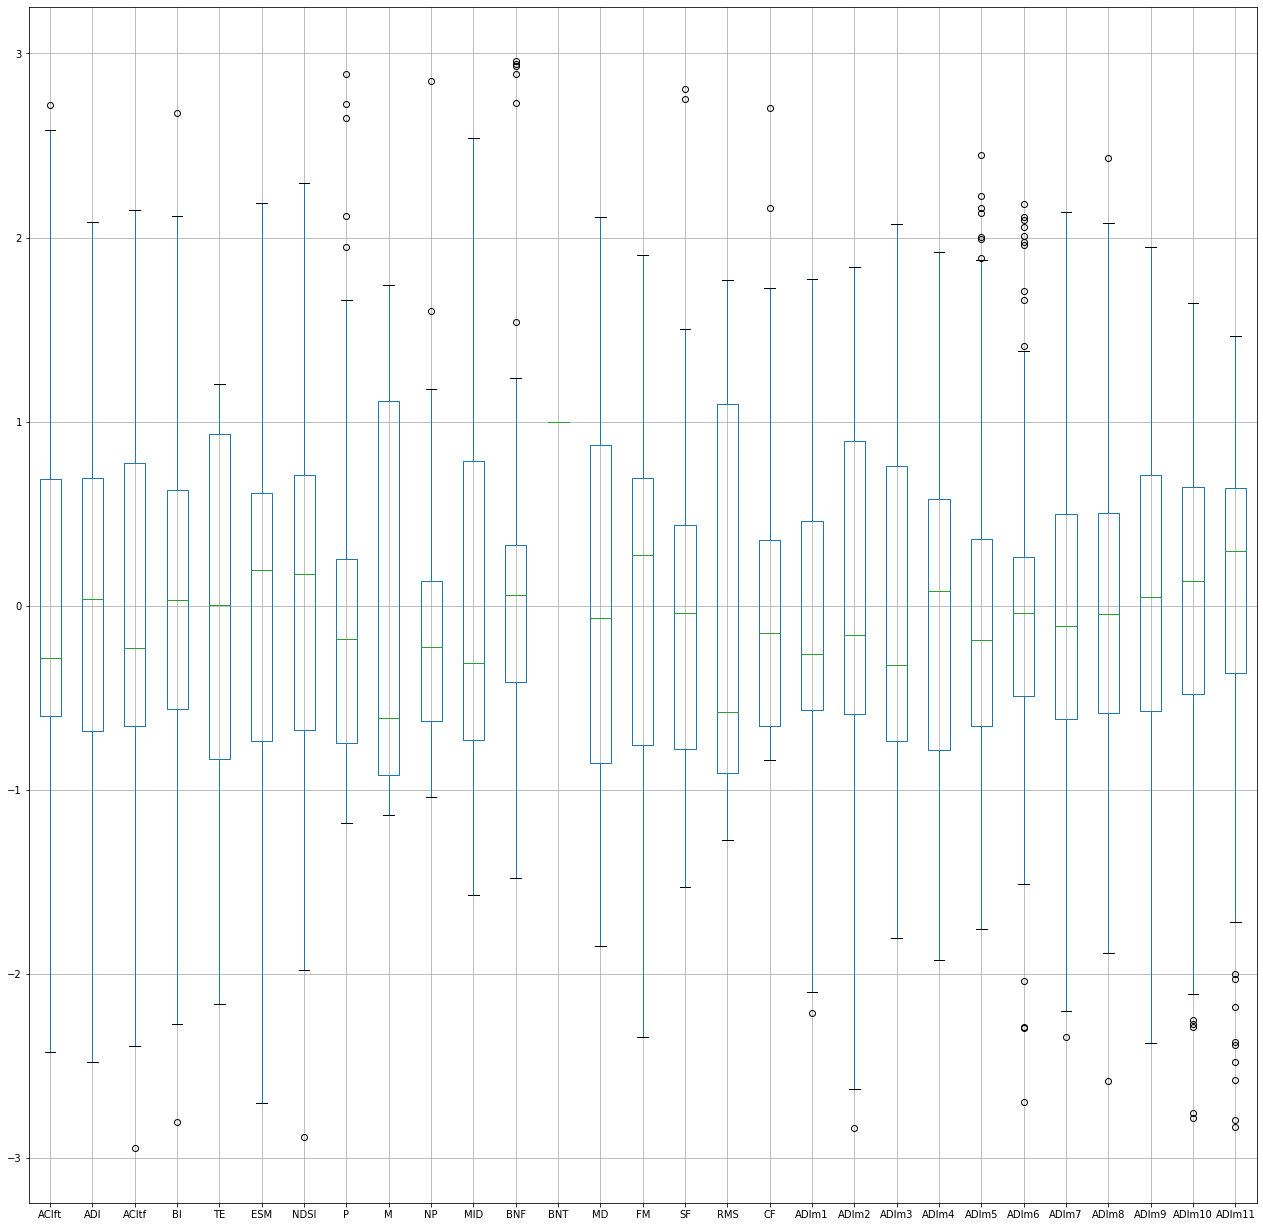

In [112]:
dwitouliers.boxplot(figsize = (22,22))

In [115]:
#BNT no aporta informacion
dwitouliers=dwitouliers.drop(['BNT'],axis=1)

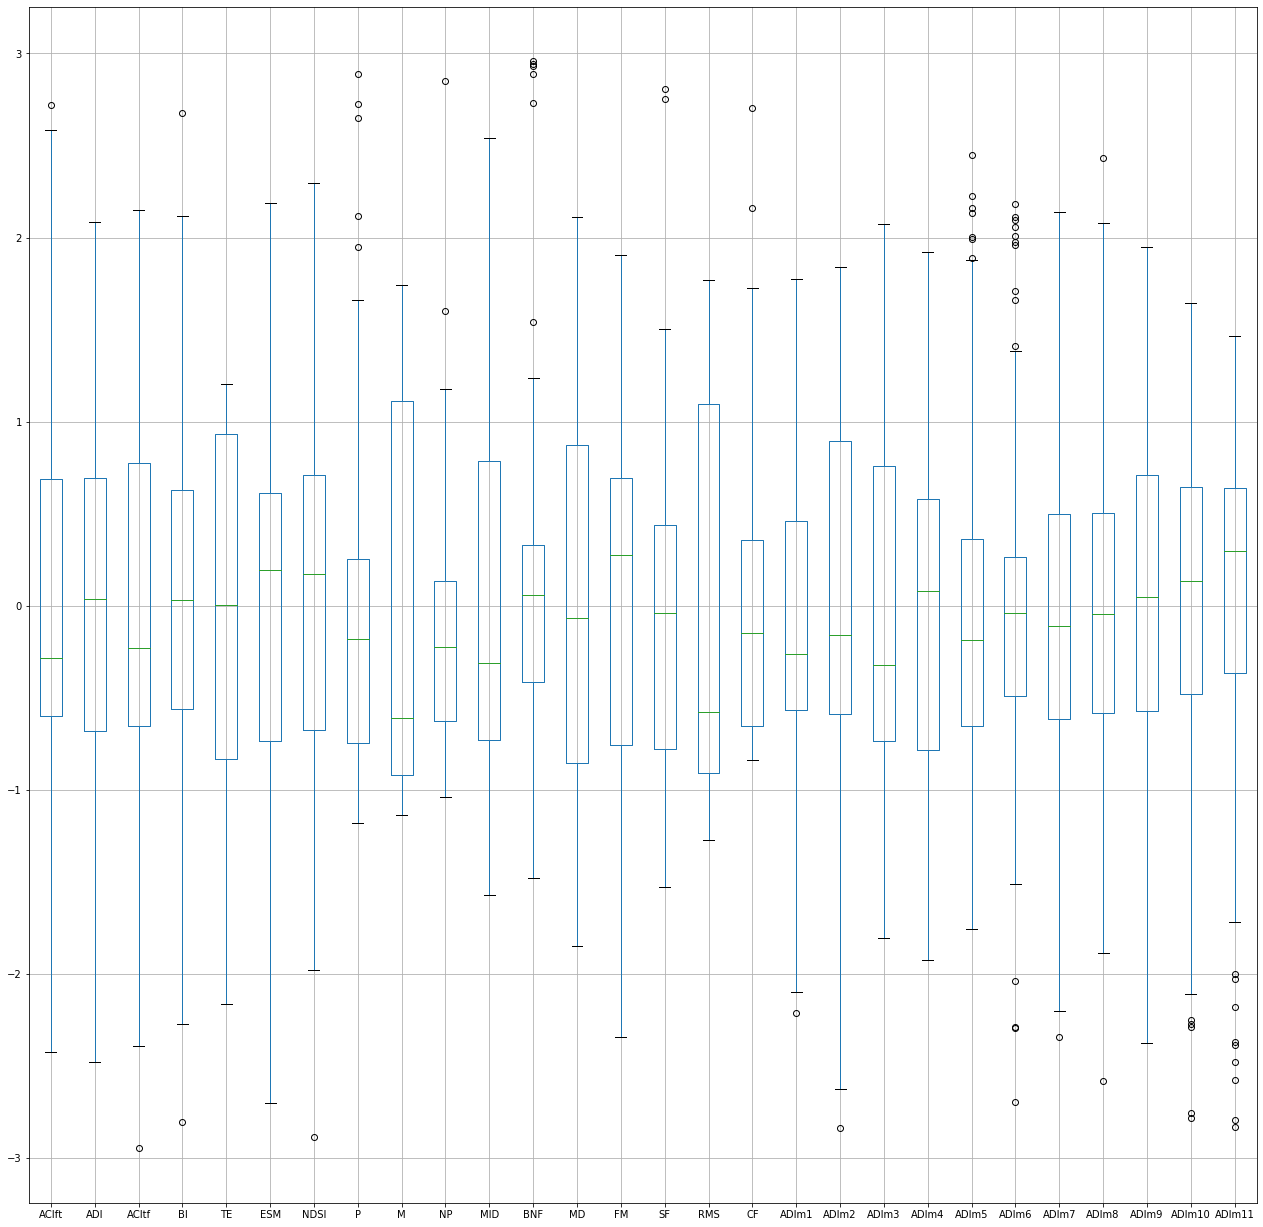

In [116]:
dwitouliers.boxplot(figsize = (22,22))

In [117]:
##En este caso dataprofe son los datos sin outliers
dataprofe=dwitouliers.copy()
from hmmlearn import hmm

modelhm=hmm.GMMHMM(n_components=8,n_mix=2,covariance_type="spherical",random_state=1) 
modelhm.fit(dataprofe)
labels = modelhm.predict(dataprofe)

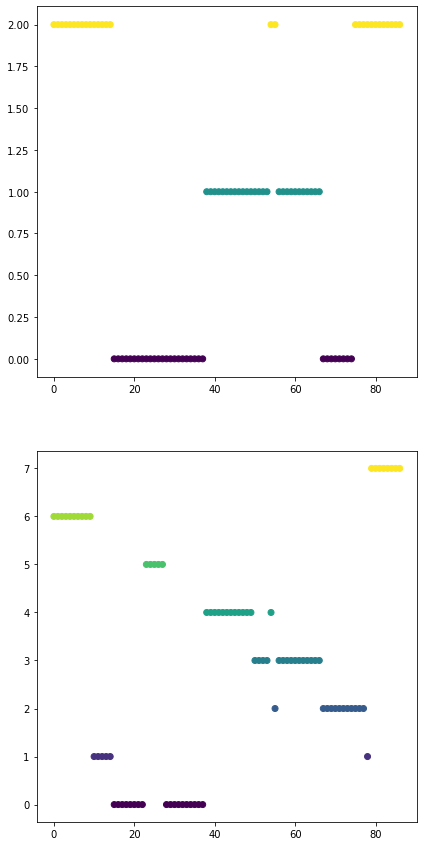

In [118]:
yp=ypruebaB
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dataprofe.shape[0])
y=yp
img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, labels, c=labels, cmap=plt.viridis())
plt.show()

In [119]:
from sklearn.metrics import accuracy_score

newlist = []

for item in labels:
    #print(item)
    if item == 0  :
        item = 0
    elif item == 1  :
        item = 2
    elif item == 2  :
        item = 0
    elif item == 3  :
        item = 1
    elif item == 4  :
        item = 1
    elif item == 5  :
        item = 0    
    elif item == 6  :
        item = 2
    elif item == 7  :
        item = 2
      
        #print(item)
    newlist.append(item)
newlist;
accuracy_score(yp,newlist)

0.9425287356321839

In [120]:
labels

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 7, 7, 7, 7, 7, 7, 7, 7])

In [121]:
MetaBolivar['labelspredichasporGMMHMM']=labels

In [122]:
MetaBolivar.to_csv('Resultadosdatosbolivartransformacion.csv')

### Databolivar para permanencia

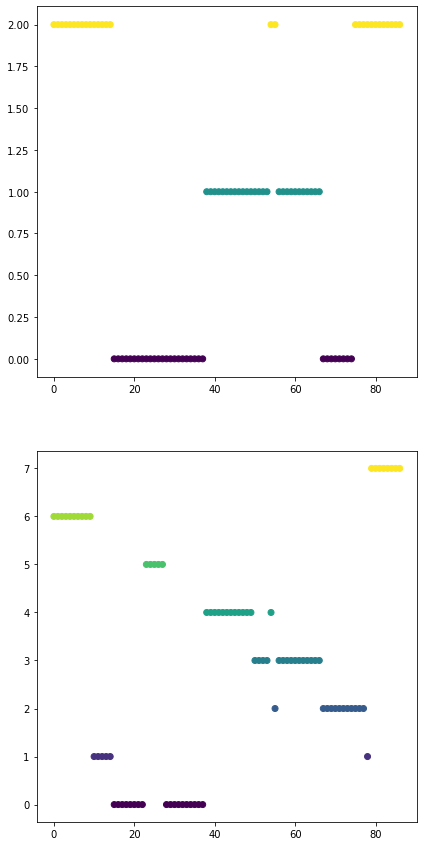

In [123]:
dataprofe=dwitouliers.copy()
from hmmlearn import hmm

modelhm=hmm.GMMHMM(n_components=8,n_mix=2,covariance_type="spherical",random_state=1) 
modelhm.fit(dataprofe)
labels = modelhm.predict(dataprofe)
yp=ypruebaBP
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dataprofe.shape[0])
y=yp
img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, labels, c=labels, cmap=plt.viridis())
plt.show()

In [124]:
from sklearn.metrics import accuracy_score

newlist = []

for item in labels:
    #print(item)
    if item == 0  :
        item = 0
    elif item == 1  :
        item = 2
    elif item == 2  :
        item = 0
    elif item == 3  :
        item = 1
    elif item == 4  :
        item = 1
    elif item == 5  :
        item = 0    
    elif item == 6  :
        item = 2
    elif item == 7  :
        item = 2
      
        #print(item)
    newlist.append(item)
newlist;
accuracy_score(yp,newlist)

0.9425287356321839

# PROCESAMIENTO GUAJIRA TRANSFORMACION

In [4]:
dGuajira = pd.read_csv("/Users/nesdav/Documents/AnalisisVariables/Datospuros/DatosGUAJIRA.csv")
dGuajira.head()

,Unnamed: 0,Grabadora,Lugar,DiaGrabadora,Transformación,Permanencia,Longitud,ACIft,ADI,ACItf,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,20160101,5067,Guajira,201601015067,Alta,Baja,73º26'3.2''W,-0.171947,0.584782,-0.475717,...,0.206630,0.260610,-0.326033,0.486937,0.232333,0.149117,-0.372678,-1.039871,-0.914863,-0.200129
1,20160102,5067,Guajira,201601025067,Alta,Baja,73º26'3.2''W,-0.304241,0.874729,-0.565690,...,0.350874,0.122914,-0.517690,0.421486,0.152173,0.262447,0.029164,-0.745587,-0.942384,-0.068598
2,20160103,5067,Guajira,201601035067,Alta,Baja,73º26'3.2''W,-0.339822,0.746814,-0.458379,...,0.290717,0.507416,-0.391097,0.740404,0.132742,0.167833,0.237685,-0.404005,-0.543876,0.101897
3,20160104,5067,Guajira,201601045067,Alta,Baja,73º26'3.2''W,-0.229584,0.918072,-0.325400,...,0.350568,0.274446,-0.362861,0.131288,-0.111861,0.054663,-0.090833,-0.648560,-0.544687,0.117638
4,20160105,5067,Guajira,201601055067,Alta,Baja,73º26'3.2''W,-0.308185,0.817189,-0.322157,...,0.240093,0.233373,-0.323291,0.180075,-0.131029,-0.073313,-0.177323,-0.836910,-0.718013,0.046863


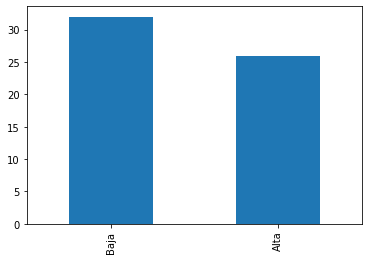

In [5]:
dGuajira['Permanencia'].value_counts().plot(kind='bar')

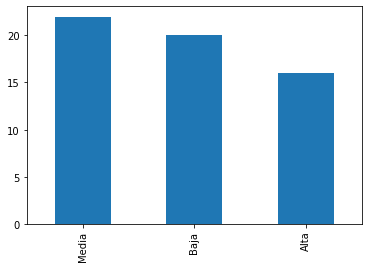

In [6]:
dGuajira['Transformación'].value_counts().plot(kind='bar')

In [8]:
#En MetaBolivar se encuentran los datos que no son las variables como la grabadora el dia etc 
MetaGuajira=dGuajira.iloc[:,1:7].copy()
dGuajira.drop(dGuajira.iloc[:, 0:7], inplace = True, axis = 1) 
dGuajira.head()
ypruebaG=MetaGuajira["Transformación"]
trans={'Alta':2,'Baja':0,'Media':1}
ypruebaG=[trans[item] for item in ypruebaG]




In [9]:
x= StandardScaler().fit_transform(dGuajira.values)  ##give numpy array values
scalx=pd.DataFrame(x,index=dGuajira.index,columns=dGuajira.columns) #so we need to transform it 
d=scalx.copy()
scalx.head()

d=scalx.copy()



In [10]:
for index ,i in enumerate(d.columns):
    print("los outliers en",d.columns[index])
    a=find_anomalies(d.iloc[:,index])
    if len(a)>2:
        for b in range(len(a)):
            print ('aaa',b)
            d[i].iloc[b]= d[i].mean()
            print ('datos corregidos', d[i].iloc[b])
    elif len(a) == 1:
        print("prim", i)
        print("second",d[i].mean())
        d[i].iloc[index]= d[i].mean()
        
dw=d.copy()

los outliers en ACIft
los outliers en ADI
los outliers en ACItf
esta en la posicion 18
prim ACItf
second -3.924064138761329e-17
los outliers en BI
los outliers en TE
esta en la posicion 39
prim TE
second -2.6798486801296883e-17
los outliers en ESM
los outliers en NDSI
los outliers en P
esta en la posicion 37
prim P
second -5.16827959739297e-17
los outliers en M
los outliers en NP
esta en la posicion 13
esta en la posicion 14
los outliers en MID
esta en la posicion 13
prim MID
second 1.5313421029312504e-17
los outliers en BNF
los outliers en BNT
los outliers en MD
los outliers en FM
esta en la posicion 37
prim FM
second 8.039546040389065e-17
los outliers en SF
los outliers en RMS
los outliers en CF
esta en la posicion 37
prim CF
second -9.092343736154299e-18
los outliers en ADIm1
esta en la posicion 18
prim ADIm1
second -3.254101968728907e-17
los outliers en ADIm2
esta en la posicion 18
prim ADIm2
second 1.2824990112049222e-16
los outliers en ADIm3
esta en la posicion 18
prim ADIm3
seco

In [11]:
##Creo una nueva db que tendra los datos sin outliers
dwitouliers=d
#y reemplazo los outliers por la media del vector 
dwitouliers.ACIft[18]=d.ACIft.mean()
dwitouliers.TE[39]=d.TE.mean()
dwitouliers.P[37]=d.P.mean()
dwitouliers.NP[13]=d.NP.mean()
dwitouliers.NP[14]=d.NP.mean()
dwitouliers.MID[13]=d.MID.mean()
dwitouliers.FM[37]=d.FM.mean()
dwitouliers.CF[37]=d.CF.mean()
dwitouliers.ADIm1[18]=d.ADIm1.mean()
dwitouliers.ADIm2[18]=d.ADIm2.mean()
dwitouliers.ADIm3[18]=d.ADIm3.mean()
dwitouliers.ADIm4[57]=d.ADIm4.mean()
dwitouliers.ADIm5[18]=d.ADIm5.mean()
dwitouliers.ADIm6[45]=d.ADIm6.mean()
dwitouliers.ADIm8[18]=d.ADIm8.mean()
dwitouliers.ADIm9[18]=d.ADIm9.mean()
dwitouliers.ADIm10[18]=d.ADIm10.mean()
dwitouliers.ADIm11[18]=d.ADIm11.mean()













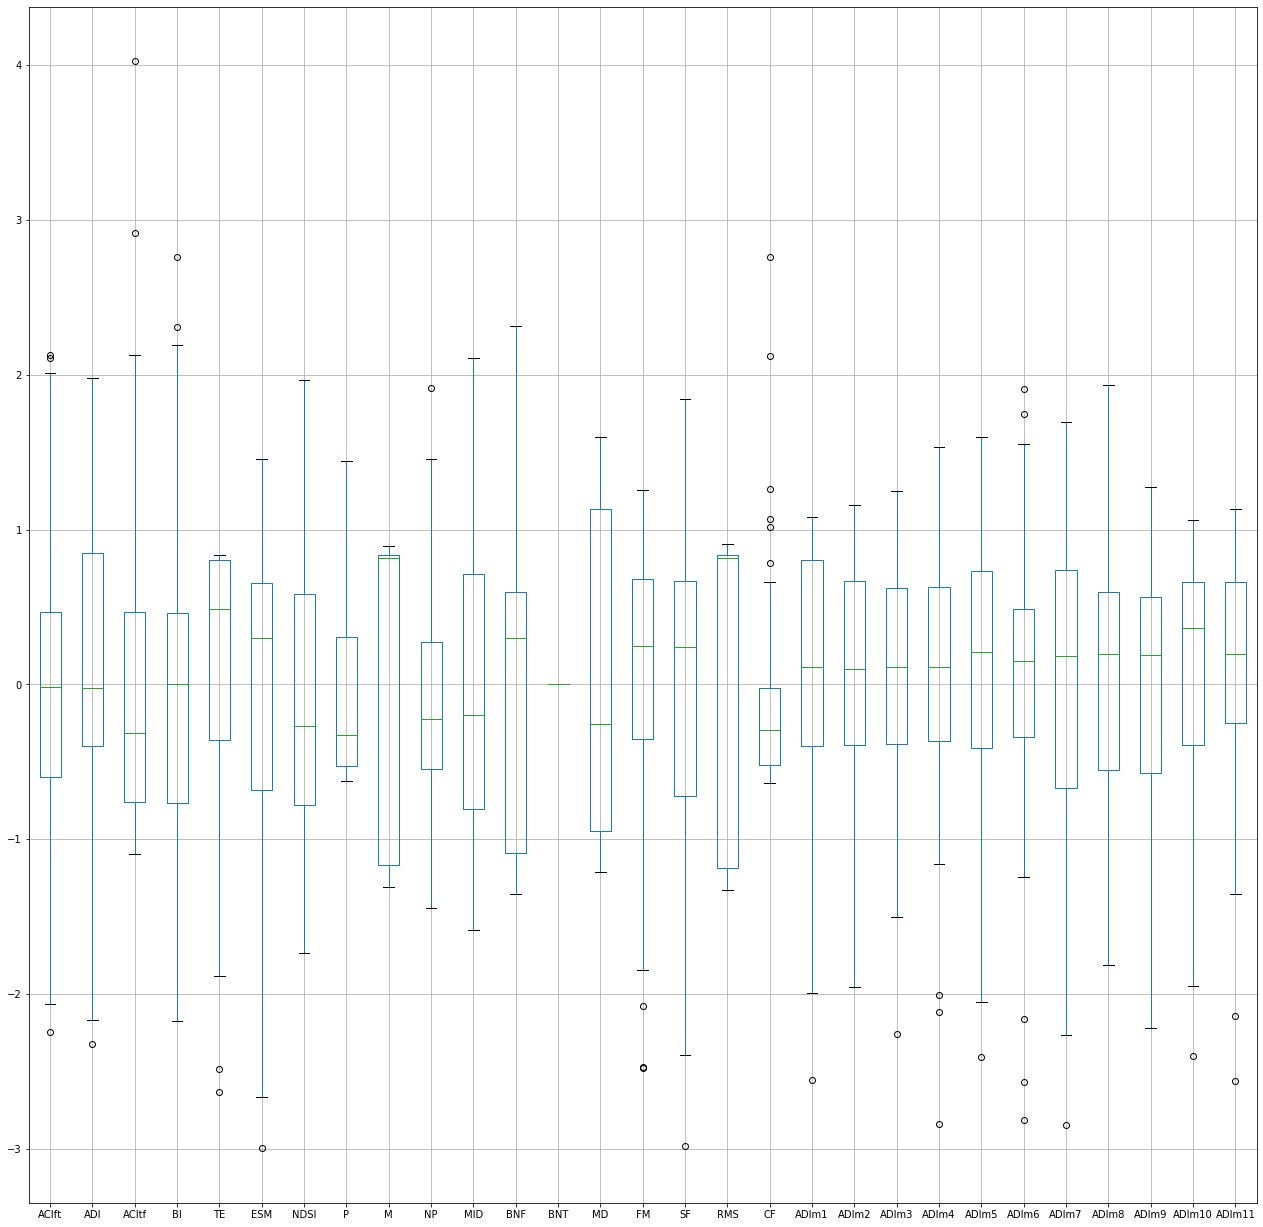

In [12]:
dwitouliers.boxplot(figsize = (22,22))

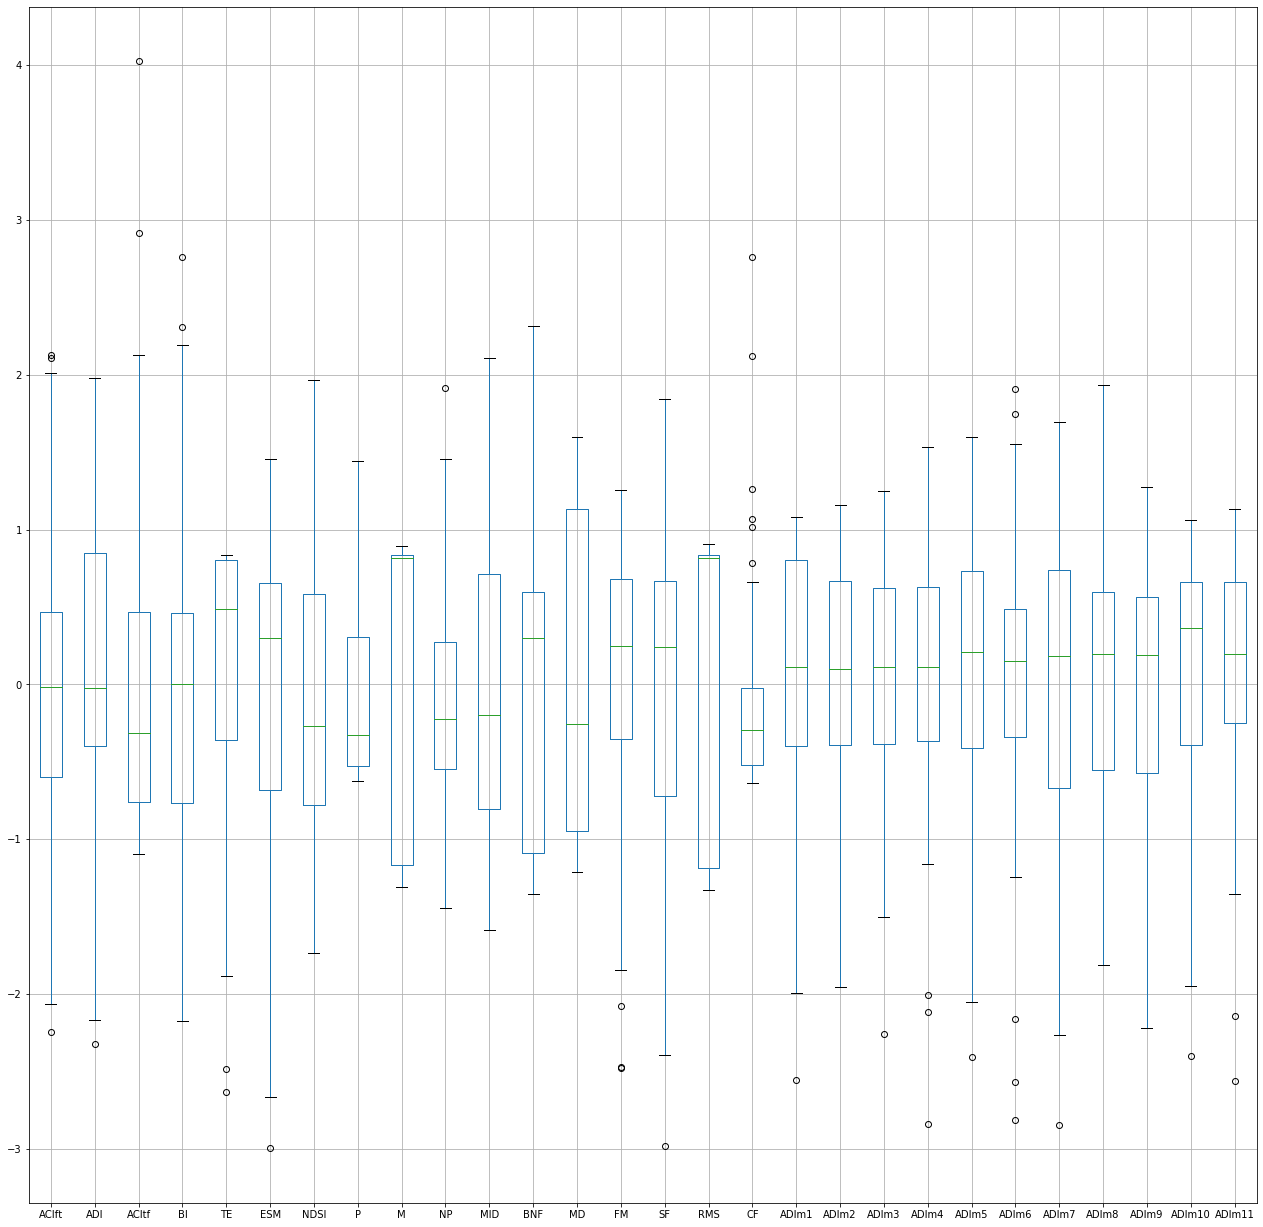

In [16]:
dwitouliers.boxplot(figsize = (22,22))

In [21]:
dwitouliers.describe()

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
count,58.000000,5.800000e+01,58.000000,5.800000e+01,58.000000,5.800000e+01,5.800000e+01,58.000000,5.800000e+01,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000
mean,-0.034126,-8.422382e-17,0.002038,7.273875e-17,0.058991,-2.651136e-16,7.273875e-17,-0.104397,-1.722760e-17,-0.136542,...,0.074509,0.067764,0.051021,0.062148,0.080787,6.125368e-17,0.065414,0.046205,0.067271,0.077030
std,0.973462,1.008734e+00,1.008610,1.008734e+00,0.919073,1.008734e+00,1.008734e+00,0.518900,1.008734e+00,0.670055,...,0.727755,0.809319,0.822633,0.902366,0.892244,1.008734e+00,0.876102,0.849719,0.830637,0.724601
min,-2.247937,-2.322593e+00,-1.093317,-2.175847e+00,-2.633385,-2.997550e+00,-1.735669e+00,-0.625825,-1.309995e+00,-1.445342,...,-1.957339,-2.261486,-2.838596,-2.407799,-2.812746,-2.846120e+00,-1.815326,-2.220323,-2.400847,-2.562192
25%,-0.601511,-4.005943e-01,-0.758225,-7.642991e-01,-0.359255,-6.849982e-01,-7.772862e-01,-0.527588,-1.164144e+00,-0.546192,...,-0.392328,-0.383739,-0.363056,-0.413414,-0.337441,-6.693737e-01,-0.550376,-0.572245,-0.394832,-0.250840
50%,-0.015106,-2.434606e-02,-0.314227,5.229868e-03,0.485916,2.961021e-01,-2.701561e-01,-0.328436,8.169261e-01,-0.225570,...,0.097751,0.110273,0.111495,0.208550,0.152460,1.827947e-01,0.197564,0.190093,0.363189,0.196699
75%,0.465920,8.506082e-01,0.469031,4.617388e-01,0.802104,6.573710e-01,5.830424e-01,0.305973,8.376636e-01,0.276378,...,0.668786,0.619836,0.628546,0.729852,0.488035,7.356577e-01,0.597306,0.566086,0.663902,0.658657
max,2.126788,1.977610e+00,4.024401,2.758288e+00,0.835979,1.456090e+00,1.965746e+00,1.441310,8.905461e-01,1.911097,...,1.155565,1.247450,1.530766,1.597186,1.907240,1.692146e+00,1.934941,1.272426,1.058312,1.130570


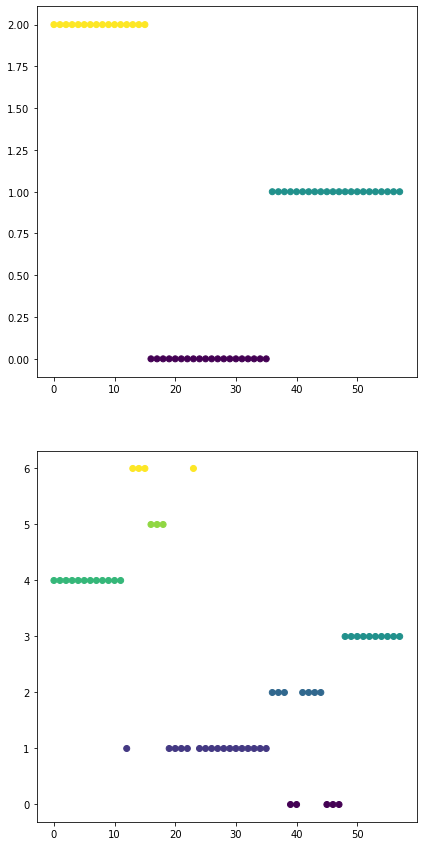

In [25]:
##En este caso dataprofe son los datos sin outliers
dataprofe=dwitouliers.copy()
from hmmlearn import hmm

modelhm=hmm.GMMHMM(n_components=7,n_mix=2,covariance_type="spherical",random_state=1) 
modelhm.fit(dataprofe)
labels = modelhm.predict(dataprofe)

yp=ypruebaG
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dataprofe.shape[0])
y=yp
img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, labels, c=labels, cmap=plt.viridis())
plt.show()

In [26]:
from sklearn.metrics import accuracy_score

newlist = []

for item in labels:
    #print(item)
    if item == 0  :
        item = 1
    elif item == 1  :
        item = 0
    elif item == 2  :
        item = 1
    elif item == 3  :
        item = 1
    elif item == 4  :
        item = 2
    elif item == 5  :
        item = 0    
    elif item == 6  :
        item = 2
      
        #print(item)
    newlist.append(item)
newlist;
accuracy_score(yp,newlist)

0.9655172413793104

In [27]:
MetaGuajira['labelspredichasporGMMHMM']=labels
MetaGuajira.to_csv('Resultadosdatosguajiratransformacion.csv')